# ** Calculate the mutability model from the trip and mut data dictionaries ** 

** import the data ** 

In [31]:
import matplotlib.pyplot as plt
import json 

In [18]:
muts_dict = json.loads(open("muts_2021_01_24_Mus_musculus.txt").readlines()[0])
trips_dict = json.loads(open("trips_2021_01_24_Mus_musculus.txt").readlines()[0])

** calculate model ** 

In [20]:
model = {}
for triplet, value in muts_dict.items(): 
    n_muts = value[0]

    #standardize the into triplets 
    into_trip_dict = {}
    for into_trip,into_count in value[1].items(): 
        if n_muts != 0:                                    #if no muts for that triplet,then keep it the same 
            into_trip_dict[into_trip] = into_count/n_muts
            
    #now divide the total num muts by the number tiplwts and create model value 
    model[triplet] = [n_muts/trips_dict[triplet], into_trip_dict]

In [24]:
with open('model_2021_01_24_Mus_musculus.txt', 'w') as outfile:
    json.dump(model, outfile)

** analyzing mouse mut model ** 

In [28]:
mouse_muts_list = []
for key, value in model.items(): 
    mouse_muts_list.append(value[0])

In [30]:
max(mouse_muts_list), min(mouse_muts_list)

(4.981200496489838e-06, 0.0)

In [33]:
plt.style.use('seaborn-ticks')

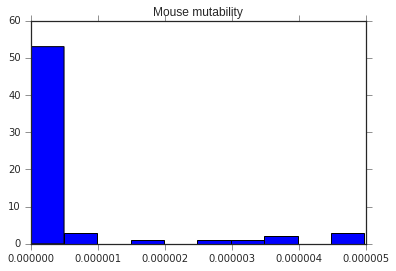

In [35]:
plt.hist(mouse_muts_list)
plt.title("Mouse mutability")
plt.show()

In [37]:
second_min = 1
for value in model.values(): 
    if value[0] != 0 and value[0]<second_min: 
        second_min= value[0]

In [38]:
second_min

8.966274211350057e-08